<a href="https://colab.research.google.com/github/88kHw88/Winc.Final_Assignment.CO2/blob/main/Final_Assignment_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please formulate an answer to the following three questions in your report.

- What is the biggest predictor of a large CO2 output per capita of a country?
- Which countries are making the biggest strides in decreasing CO2 output?
- Which non-fossil fuel energy technology will have the best price in the future?


masterdata:
https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv
https://ourworldindata.org/new-co2-data-explorer 


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
%load_ext google.colab.data_table

## **What is the biggest predictor of a large CO2 output per capita of a country?**

1 GDP vs CO2 emissions

2 Fossil fuels vs CO2 emissions 

3 Lands use/food vs CO2 emissions 

- Agricultural land use is the sum of cropland and pasture for livestock grazing.

4 Transport vs CO2 emissions
- This interactive shows the emissions of carbon dioxide from transport each year. 
- This includes road, train, bus and domestic air travel but does not include international aviation and shipping.



In [ ]:
#importing data from github

df_gdp = pd.read_csv('https://raw.githubusercontent.com/88kHw88/Winc.Final_Assignment.CO2/main/data_question_1/co2-emissions-vs-gdp.csv')
df_ff = pd.read_csv('https://raw.githubusercontent.com/88kHw88/Winc.Final_Assignment.CO2/main/data_question_1/co2-emissions-by-fuel-line.csv')
df_land = pd.read_csv('https://raw.githubusercontent.com/88kHw88/Winc.Final_Assignment.CO2/main/data_question_1/agricultural-land.csv')
df_co2 = pd.read_csv('https://raw.githubusercontent.com/88kHw88/Winc.Final_Assignment.CO2/main/data_question_1/annual-co2-emissions-per-country.csv')
df_transport = pd.read_csv('https://raw.githubusercontent.com/88kHw88/Winc.Final_Assignment.CO2/main/data_question_1/co2-emissions-transport.csv')



In [ ]:
### Defining functions ###

#function to set unique values and adding a new column:
def unique_column(df, col_name_new, col_name1, col_name2, dtype):
  df[col_name_new] = df[col_name1].astype(dtype) + "_" + df[col_name2].astype(dtype)

#function to drop a column from a dataset:
def drop_column(df, column_name1):
  df.drop(columns=column_name1)  

#function to calculate Pearson's correlation:
def correlation(df, column_name, column_name2):
  relation = round(df[column_name].corr(df[column_name2]),4)  
  print(f"The correlation between '{column_name}' and '{column_name2}' is: {relation}")

#function to replace data values:
def replace(df, column_name, old_value, new_value):
  column = df[column_name]
  df[column_name] = column.replace({old_value:new_value})

#functions to find missing values:
def uniques(column):
   print(f'This column has the following unique values:\n {column.unique()}\n')

def edges(column):
  try:
    print(f'Sorting unique values:\n {column.sort_values().unique()}\n')
  except ValueError as error:
    print(f'Can"t sort unique values: {error}\n')

def casting(column, dtype):
  try:
    column.astype(dtype)
    print(f'Casting column to {dtype} is successful\n')
  except ValueError as error:
    print(f'Can"t use casting on this column: {error}\n')

def count_values(column):
  print(f"Counting unique values:\n {column.value_counts()}\n")


def finding_missing_values(df, column_name, dtype):
  column = df[column_name]

  print(f'Analyzing missing values in column {column_name}\n ')
  uniques(column)
  edges(column)
  casting(column, dtype)
  count_values(column)
  print('*'*80)

In [ ]:
#Make a new column by making a unique value that each dataset has in order to merge datasets
unique_column(df_transport, 'entity_year', 'Entity', 'Year', str)
unique_column(df_co2, 'entity_year', 'Entity', 'Year', str)
unique_column(df_land, 'entity_year', 'Entity', 'Year', str)
unique_column(df_ff, 'entity_year', 'Entity', 'Year', str)

In [ ]:
#GDP dataset columns:
df_gdp.columns

#remove irrelevant columns:
df_gdp2 = df_gdp.drop(columns=['Code', '145446-annotations', 'Total population (Gapminder, HYDE & UN)', 'Continent'])
df_gdp2

#drop nan values in columns Annual CO2 emissions (per capita) or GDP per capita:
df_gdp2.dropna(subset=['Annual CO2 emissions (per capita)', 'GDP per capita'])

#Finding correlation between Annual CO2 emissions per capita and GDP per capita:
df_gdp2['Annual CO2 emissions (per capita)'].corr(df_gdp2['GDP per capita'])
#check alternative way:
#df_gdp2.corr()

0.6747265670645733

In [ ]:
#Create a new dataset by combining data of CO2 with data of Transport:
#Merge dataset CO2 and Transport together:
df_co2_ff = pd.merge(df_co2, df_ff, on='entity_year')

#Deleting/renaming columns on dataset CO2_transport:
df_co2_ff = df_co2_ff.drop(columns=['Code_x', 'Year_x', 'Entity_y', 'Code_y'])
df_co2_ff = df_co2_ff.rename(columns={'Entity_x':'Entity', 'Year_y': 'Year'})


#Set index:
df_co2_ff = df_co2_ff.set_index(['Entity'])

#filling default missing values with (0):
df_co2_ff = df_co2_ff.fillna(0)
df_co2_ff.head(5)

#applying Pearson correlation
correlation_co2_ff = round(df_co2_ff.corr(),4)
correlation_co2_ff.iloc[0:1, 2:]

,Annual CO2 emissions from oil,Annual CO2 emissions from flaring,Annual CO2 emissions from cement,Annual CO2 emissions from coal,Annual CO2 emissions from gas,Annual CO2 emissions from other industry
Annual CO2 emissions,0.972,0.8383,0.9005,0.9619,0.9403,0.7204


In [ ]:
#Create a new dataset by combining data of CO2 with data of Transport:
#Merge dataset CO2 and Transport together:
df_co2_transport = pd.merge(df_co2, df_transport, on='entity_year')

#Deleting/renaming columns or rows on dataset CO2_transport:
df_co2_transport = df_co2_transport.drop(columns=['Code_x', 'Year_x', 'Entity_y', 'Code_y'])
df_co2_transport = df_co2_transport.rename(columns={'Entity_x':'Entity', 'Transport (CAIT, 2020)': 'CO2 emissions by transport', 'Year_y': 'Year'})

#set index:
df_co2_transport = df_co2_transport.set_index(['Entity'])
df_co2_transport.head(5)

#applying Pearson correlation
correlation(df_co2_transport, 'Annual CO2 emissions', 'CO2 emissions by transport')
#check alternative correlation:
#df_co2_transport.corr()


The correlation between 'Annual CO2 emissions' and 'CO2 emissions by transport' is: 0.9865


In [ ]:
#Create a new dataset by combining data of CO2 with data of 'Land':
#Merge dataset CO2 and Land together:
df_co2_land = pd.merge(df_co2, df_land, on='entity_year')

#Deleting/renaming columns on dataset CO2_land:
df_co2_land = df_co2_land.drop(columns=['Code_x', 'Year_x', 'Entity_y', 'Code_y'])
df_co2_land = df_co2_land.rename(columns={'Entity_x':'Entity', 'Year_y': 'Year'})

#set index
df_co2_land = df_co2_land.set_index(['Entity'])
df_co2_land.head(5)

#Apply Pearson correlation
correlation(df_co2_land, 'Annual CO2 emissions', 'agricultural_land')

#Alternative way to check relation:
#df_co2_land.corr()


The correlation between 'Annual CO2 emissions' and 'agricultural_land' is: 0.8982


antwoord:
Transport heeft een hele sterke relatie met CO2 output. De relatie is 0,98.

Gevolgd door fossiele brandstof, waarvan olie (0,97) en kolen (0,96) de grootste voorspellers zijn in de toename van de CO2 uitstoot.


**Which countries are making the biggest strides in decreasing CO2 output?**

Het klimaatverdrag waarin afspraken en conferenties werden gehouden om de CO2 uitstoot te verminderen. 
https://nl.wikipedia.org/wiki/Klimaatverdrag 

1990 - referentiepunt, beginwaarde



Relatively Change:
CO2 output per capita: 

basis is data 2015 (periode voor het ondertekenen van het Klimaatverdrag, Akkoord van Parijs in 2015)

relatieve veranderingen tussen 2016, 2017 en 2018. Deze tellen wij cumulatief op. Het land met de grootste negatieve cumulatieve waarde is het land die het meest doet aan het verminderen van CO2 uitstoot

**Maak gebruik van data df_gdp2:**

Bevat al data 'CO2 per hoofd' (we houden hiermee rekening mee met de CO2 uitstoot per inwoner)


**Achtergrondinfo:**


Co emissions per capita 2
Where in the world do people emit the most CO2?

Greenhouse gas emissions by sector
Total annual emissions allow us to see the world’s largest emitters in absolute terms. 
But they tend to tell a story of population – China and India, for example, are in the top three emitters, 
but are also the two most populous countries in the world.

How do emissions compare when we correct for population?

This interactive map shows per capita greenhouse gas emissions. This is measured in tonnes per person per year.

Here we see that many of the world’s smaller countries are the largest per capita emitters. 
These countries, such as Guyana, Brunei, Botswana, the United Arab Emirates and Kuwait tend to be large oil and/or gas producers.

Of the major emitters we see large differences in per capita emissions: 
 in the US, the average person emits more than 18 tonnes; in China its less than half, at 8 tonnes; and in India, emissions are much smaller at around 2.5 tonnes.
"""

In [ ]:
#using df_gdp2 where we removed irrelevant columns
df_gdp2.head(5)

#remove all missing values from column 'Annual CO2 emissions (per capita)' and 'GDP per capita'
df1_gdp2 = df_gdp2.dropna(subset=['Annual CO2 emissions (per capita)', 'GDP per capita'])
df1_gdp2

#checking data and unique values/missing values:
finding_missing_values(df1_gdp2, 'Entity', 'str') #-->  'World' is a non-country


Analyzing missing values in column Entity
 
This column has the following unique values:
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Benin' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Honduras' 'Hong Kong'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait'
 'Kyrgyzs

In [ ]:
#removing 'World' from our dataset
df2_gdp2 = df1_gdp2.drop(df1_gdp2[df1_gdp2.Entity == 'World'].index)


In [ ]:
#Our base is 2015, because of the Treaty of Paris (Klimaatakkoord Parijs 2015):
#Data filteren op jaar: 2016, 2017 en 2018 is.
#Filter on a specific year:
yr_2015 = df2_gdp2.loc[df2_gdp2.Year == 2015]
yr_2016 = df2_gdp2.loc[df2_gdp2.Year == 2016]
yr_2017 = df2_gdp2.loc[df2_gdp2.Year == 2017]
yr_2018 = df2_gdp2.loc[df2_gdp2.Year == 2018]

In [ ]:
#Merging datasets 2015, 2016, 2017 and 2018
df2015_2016 = pd.merge(yr_2015, yr_2016, on='Entity')
df2015_2016 = df2015_2016.rename(columns={'Annual CO2 emissions (per capita)_x': 'CO2 emissions 2015 (per capita)', 'Annual CO2 emissions (per capita)_y':'CO2 emissions 2016 (per capita)'})
df2015_2016_2017 = pd.merge(df2015_2016, yr_2017, on='Entity')
df_q2 = pd.merge(df2015_2016_2017, yr_2018, on='Entity')
df_q2.head(5)
#Renaming column names
df_q2 = df_q2.rename(columns={'Annual CO2 emissions (per capita)_x': 'CO2 emissions 2017 (per capita)', 'Annual CO2 emissions (per capita)_y': 'CO2 emissions 2018 (per capita)'})

#Drop irrelevant columns
df_q2 = df_q2.drop(columns=['Year_x', 'GDP per capita_x', 'Year_y', 'GDP per capita_y'])
df_q2.head(5)


,Entity,CO2 emissions 2015 (per capita),CO2 emissions 2016 (per capita),CO2 emissions 2017 (per capita),CO2 emissions 2018 (per capita)
0,Afghanistan,0.2297,0.1906,0.1890,0.2812
1,Albania,1.5680,1.5575,1.8738,1.8743
2,Algeria,3.7963,3.6704,3.7075,3.8910
3,Angola,1.2186,1.1827,1.2567,1.2229
4,Argentina,4.4658,4.3883,4.2655,4.1710


In [ ]:
#Calculating relative change between years
#relative change per year (2016 - 2015 / 2015)*100, ((2017-2016(/2016)*100 etc
rel_change_2015 = round((df_q2['CO2 emissions 2015 (per capita)'] - df_q2['CO2 emissions 2015 (per capita)']) / df_q2['CO2 emissions 2015 (per capita)'] *100, 2)
rel_change_2016 = round((df_q2['CO2 emissions 2016 (per capita)'] - df_q2['CO2 emissions 2015 (per capita)']) / df_q2['CO2 emissions 2015 (per capita)'] *100, 2)
rel_change_2017 = round((df_q2['CO2 emissions 2017 (per capita)'] - df_q2['CO2 emissions 2016 (per capita)']) / df_q2['CO2 emissions 2016 (per capita)'] *100, 2)
rel_change_2018 = round((df_q2['CO2 emissions 2018 (per capita)'] - df_q2['CO2 emissions 2017 (per capita)']) / df_q2['CO2 emissions 2017 (per capita)'] *100, 2)

#Cumulative CO2 emissions 
cumulative_change_total = rel_change_2016 + rel_change_2017 + rel_change_2018
cumulative_change_2016 = rel_change_2016
cumulative_change_2017 = rel_change_2017 + rel_change_2016

#adding new columns in dataset
df_q2['relative change 2015 per capita in %'], df_q2['relative change 2016 per capita in %'], df_q2['relative change 2017 per capita in %'], df_q2['relative change 2018 per capita in %'], df_q2['cumulative change total in %'], df_q2['cumulative change 2016'], df_q2['cumulative change 2017'] = rel_change_2015, rel_change_2016, rel_change_2017, rel_change_2018, cumulative_change_total, cumulative_change_2016, cumulative_change_2017
#remove irrelant columns (CO2 year xxxx)
df1_q2 = df_q2.drop(columns={'CO2 emissions 2015 (per capita)', 'CO2 emissions 2016 (per capita)', 'CO2 emissions 2017 (per capita)', 'CO2 emissions 2018 (per capita)'})
df1_q2

#set index
df1_q2.set_index('Entity')



,relative change 2015 per capita in %,relative change 2016 per capita in %,relative change 2017 per capita in %,relative change 2018 per capita in %,cumulative change total in %,cumulative change 2016,cumulative change 2017
Entity,,,,,,,
Afghanistan,0.0,-17.02,-0.84,48.78,30.92,-17.02,-17.86
Albania,0.0,-0.67,20.31,0.03,19.67,-0.67,19.64
Algeria,0.0,-3.32,1.01,4.95,2.64,-3.32,-2.31
Angola,0.0,-2.95,6.26,-2.69,0.62,-2.95,3.31
Argentina,0.0,-1.74,-2.80,-2.22,-6.76,-1.74,-4.54
...,...,...,...,...,...,...,...
Venezuela,0.0,-3.77,-8.75,-10.07,-22.59,-3.77,-12.52
Vietnam,0.0,-0.49,-2.53,14.84,11.82,-0.49,-3.02
Yemen,0.0,-21.80,-5.39,-3.88,-31.07,-21.80,-27.19


<Figure size 720x1080 with 0 Axes>

<Figure size 432x288 with 0 Axes>

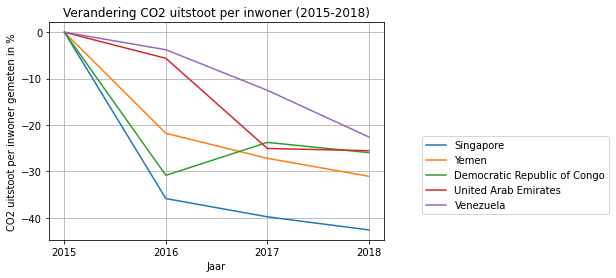

<Figure size 720x1080 with 0 Axes>

In [ ]:
#plotting a line diagram
#apply cumulative CO2 % per year
#showing top 5 countries that has the most CO2 reduction
df_top5 = df1_q2.sort_values('cumulative change total in %').head(5)
#drop columns:
df_top5 = df_top5.drop(columns={'relative change 2016 per capita in %', 'relative change 2017 per capita in %', 'relative change 2018 per capita in %'})
#rename columns
df_top5 = df_top5.rename(columns={'relative change 2015 per capita in %':'2015', 'cumulative change 2016':'2016', 'cumulative change 2017':'2017', 'cumulative change total in %': '2018'})

#re-ordering columns
df_top5 = df_top5[['Entity', '2015','2016', '2017', '2018']]
df_top5 = df_top5.set_index('Entity')

#variable for years
years = df_top5.columns[0:5]
years

fig = plt.figure()
fig, ax = plt.subplots()

#for loop to plot dataset
for index, row in df_top5.iterrows():
  plt.plot(years, row, label=index)

ax.set_xlabel("Jaar")
ax.set_ylabel("CO2 uitstoot per inwoner gemeten in %")
ax.set_title('Verandering CO2 uitstoot per inwoner (2015-2018)')
plt.rcParams["figure.figsize"] = (10, 15) #Chart scaling
plt.legend(loc='best', bbox_to_anchor=(1.1, 0.5))
plt.grid(True)
plt.figure()

#toevoegen van kleine stappen. Legenda groter maken, tabel kleiner maken

Conclusie: Singapore doet het meest aan het reduceren van de CO2 uitstoot.
Ten opzichte van de CO2 uitstoot per inwoner van 2015 is het CO2 uitstoot per inwoner in 2018 met maar liefst 42,64% gedaald.  

In [ ]:
df_top5

,2015,2016,2017,2018
Entity,,,,
Singapore,0.0,-35.88,-39.81,-42.64
Yemen,0.0,-21.80,-27.19,-31.07
Democratic Republic of Congo,0.0,-30.87,-23.76,-25.97
United Arab Emirates,0.0,-5.63,-25.07,-25.55
Venezuela,0.0,-3.77,-12.52,-22.59



####


#Which non-fossil fuel energy technology will have the best price in the future?
#https://ourworldindata.org/renewable-energy

## To be able to predict prices you'll probably need to use linear regression over the various non-fossil fuel options.


Achtergrondinformatie:

https://www.irena.org/publications/2021/Jun/Renewable-Power-Costs-in-2020

Between 2000 and 2020, renewable power generation capacity worldwide increased 3.7‑fold, from 754 gigawatts (GW) to 2 799 GW, as their costs have fallen sharply, driven by steadily improving technologies, economies of scale, competitive supply chains and improving developer experience. Costs for electricity from utility-scale solar photovoltaics (PV) fell 85% between 2010 and 2020.

The cost of electricity from solar and wind power has fallen, to very low levels. Since 2010, globally, a cumulative total of 644 GW of renewable power generation capacity has been added with estimated costs that have been lower than the cheapest fossil fuel-fired option in each respective year. In emerging economies, the 534 GW added at costs lower than fossil fuels, will reduce electricity generation costs by up to USD 32 billion this year.


Using installed capacity to calculate the cost:

https://exploringgreentechnology.com/glossary/installed-capacity-definition/

https://exploringgreentechnology.com/solar-energy/cost-of-solar-panels/
Solar costs per kWh hour are calculated by dividing the total expected cost of a system (modules, inverters, installation etc) by the expected total energy output. Obviously there isn't an ongoing per kWh cost as the electricity trickles in.

"""

non-fossil energy:
hydro
solar
wind
nuclear
gas

"""

Methodiek om prijs te berekenen:

1) Using LCOE of various renewable energy sources to calculate the price per KWH


In [ ]:
#using LCOE method: Levelized Cost of Energy
#This system allows us to compare the costs of financing, building, running, and maintaining a power plant. The values of each energy source will be expressed in US dollars per megawatt-hour.
#The LCOE "represents the average revenue per unit of electricity generated that would be required to recover the costs of building and operating a generating plant during an assumed financial life and duty cycle

#import data
df_lcoe = pd.read_csv('https://raw.githubusercontent.com/88kHw88/Winc.Final_Assignment.CO2/main/data_question_3/levelized-cost-of-energy.csv')
df_lcoe


,Entity,Code,Year,CSP LCOE (2019 USD/kWh),Hydro LCOE (2019 USD/kWh),Solar LCOE (2019 USD/kWh),Onshore wind LCOE (2019 USD/kWh),Bioenergy LCOE (2019 USD/kWh),Geothermal LCOE (2019 USD/kWh),Offshore wind LCOE (2019 USD/kWh)
0,Brazil,BRA,1998,NaN,NaN,NaN,0.069,NaN,NaN,NaN
1,Brazil,BRA,2001,NaN,NaN,NaN,0.149,NaN,NaN,NaN
2,Brazil,BRA,2002,NaN,NaN,NaN,0.129,NaN,NaN,NaN
3,Brazil,BRA,2003,NaN,NaN,NaN,0.145,NaN,NaN,NaN
4,Brazil,BRA,2005,NaN,NaN,NaN,0.137,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
408,World,OWID_WRL,2005,NaN,NaN,NaN,0.104,NaN,NaN,0.105
409,World,OWID_WRL,2006,NaN,NaN,NaN,0.105,NaN,NaN,0.108
410,World,OWID_WRL,2007,NaN,NaN,NaN,0.098,NaN,0.048498,0.178
411,World,OWID_WRL,2008,NaN,NaN,NaN,0.088,NaN,0.042653,0.178


In [26]:
#analying data
df_lcoe.describe()

#renaming dataset:
df_lcoe = df_lcoe.rename(columns={'CSP LCOE (2019 USD/kWh)':'CSP (USD/kWh)', 'Hydro LCOE (2019 USD/kWh)': 'Hydro power (USD/kWh)', 'Onshore wind LCOE (2019 USD/kWh)': 'Onshore wind power (USD/kWh)', 'Solar LCOE (2019 USD/kWh)':'Solar power (USD/kWh)','Bioenergy LCOE (2019 USD/kWh)': 'Bio-energy (USD/kWh)','Geothermal LCOE (2019 USD/kWh)':'Geothermal power (USD/kWh)', 'Offshore wind LCOE (2019 USD/kWh)':'Offshore wind power (USD/kWh)'})
df_lcoe

#dropping columns because of low amount of data point
#df_lcoe.drop(columns=['CSP LCOE (2019 USD/kWh)', ('Hydro LCOE (2019 USD/kWh)', 'Bioenergy LCOE')])

#dataset for onshore wind energy dropping missing values:
df_lcoe_onshore = df_lcoe.dropna(subset=['Year', 'Onshore wind power (USD/kWh)'])
df_lcoe_onshore.head(5)

#dataset for solar energy dropping missing values:
df_lcoe_solar = df_lcoe.dropna(subset=['Year', 'Solar power (USD/kWh)'])
df_lcoe_solar.head(5)

#dataset for hydro energy dropping missing values:
df_lcoe_hydro = df_lcoe.dropna(subset=['Year', 'Hydro power (USD/kWh)'])
df_lcoe_hydro.head(5)

#dataset for concentrated solar power (CSP) dropping missing values:
df_lcoe_csp = df_lcoe.dropna(subset=['Year', 'CSP (USD/kWh)'])
df_lcoe_csp.head(5)

#dataset for bio-energy power dropping missing values:
df_lcoe_bio = df_lcoe.dropna(subset=['Year', 'Bio-energy (USD/kWh)'])
df_lcoe_bio.head(5)

#dataset for geothermal power dropping missing values:
df_lcoe_geo = df_lcoe.dropna(subset=['Year', 'Geothermal power (USD/kWh)'])
df_lcoe_geo.head(5)

#dataset for geothermal power dropping missing values:
df_lcoe_offshore = df_lcoe.dropna(subset=['Year', 'Offshore wind power (USD/kWh)'])
df_lcoe_offshore.head(5)

df_lcoe.head(20)

,Entity,Code,Year,CSP (USD/kWh),Hydro power (USD/kWh),Solar power (USD/kWh),Onshore wind power (USD/kWh),Bio-energy (USD/kWh),Geothermal power (USD/kWh),Offshore wind power (USD/kWh)
0,Brazil,BRA,1998,NaN,NaN,NaN,0.069,NaN,NaN,NaN
1,Brazil,BRA,2001,NaN,NaN,NaN,0.149,NaN,NaN,NaN
2,Brazil,BRA,2002,NaN,NaN,NaN,0.129,NaN,NaN,NaN
3,Brazil,BRA,2003,NaN,NaN,NaN,0.145,NaN,NaN,NaN
4,Brazil,BRA,2005,NaN,NaN,NaN,0.137,NaN,NaN,NaN
5,Brazil,BRA,2006,NaN,NaN,NaN,0.105,NaN,NaN,NaN
6,Brazil,BRA,2007,NaN,NaN,NaN,0.110,NaN,NaN,NaN
7,Brazil,BRA,2008,NaN,NaN,NaN,0.090,NaN,NaN,NaN
8,Brazil,BRA,2009,NaN,NaN,NaN,0.114,NaN,NaN,NaN
9,Brazil,BRA,2010,NaN,NaN,NaN,0.111,NaN,NaN,NaN


In [ ]:
#define function to plot a scatterplot
def plot_scatterplot(df, column1, column2):
  fig = plt.figure()
  fig, ax = plt.subplots()

  x = df[column1]
  y = df[column2]
  try:
    coefs = poly.polyfit(x, y, 1)
    ffit = poly.polyval(x, coefs)
    plt.plot(x, ffit, color='red' )
  except ValueError as error:
    print(f"Could not plot linear regression line because:{error}")
  
  plt.title(f'Future price prediction of {column2}')
  plt.xlabel(column1)
  plt.ylabel(column2)  
  ax.scatter(x, y)
  plt.show()

<Figure size 720x1080 with 0 Axes>

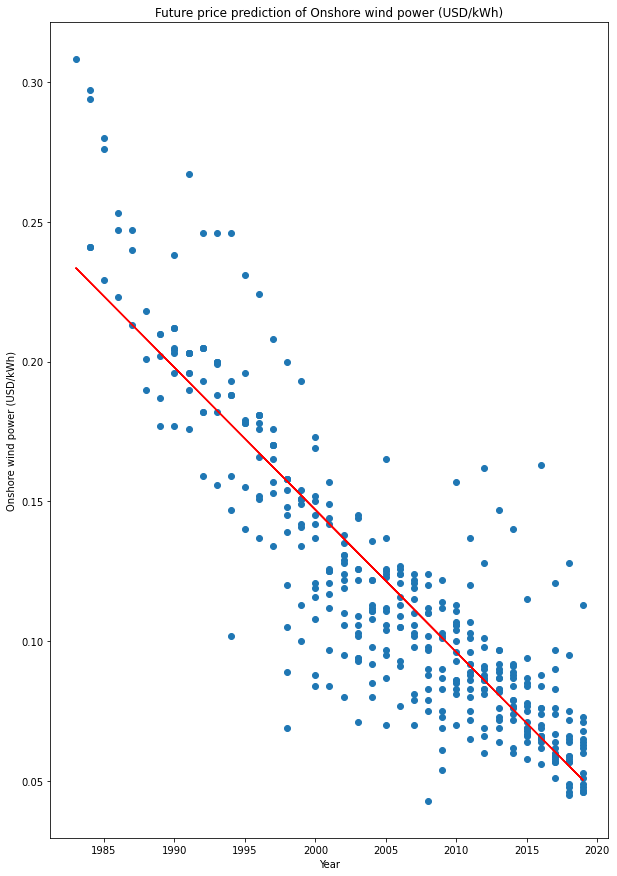

The correlation between 'Year' and 'Onshore wind power (USD/kWh)' is: -0.8897


In [ ]:
#plot scatterplot of Onshore wind power LCOE (USD/kWh):
plot_scatterplot(df_lcoe_onshore, 'Year', 'Onshore wind power (USD/kWh)')
correlation(df_lcoe_onshore, 'Year', 'Onshore wind power (USD/kWh)')

<Figure size 720x1080 with 0 Axes>

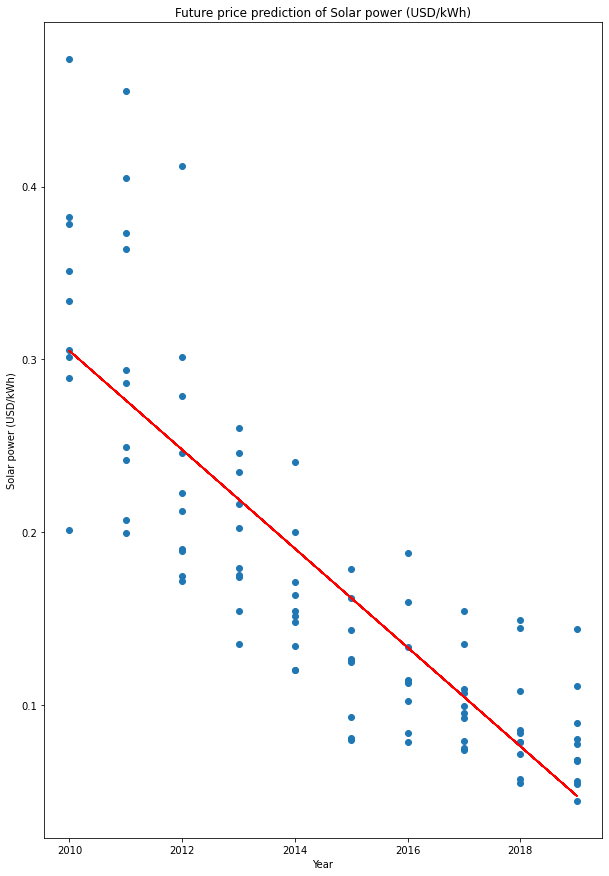

The correlation between 'Year' and 'Solar power (USD/kWh)' is: -0.8339


In [ ]:
#plot scatterplot of solar power LCOE (USD/kWh):
plot_scatterplot(df_lcoe_solar, 'Year', 'Solar power (USD/kWh)')
correlation(df_lcoe_solar, 'Year', 'Solar power (USD/kWh)')


<Figure size 720x1080 with 0 Axes>

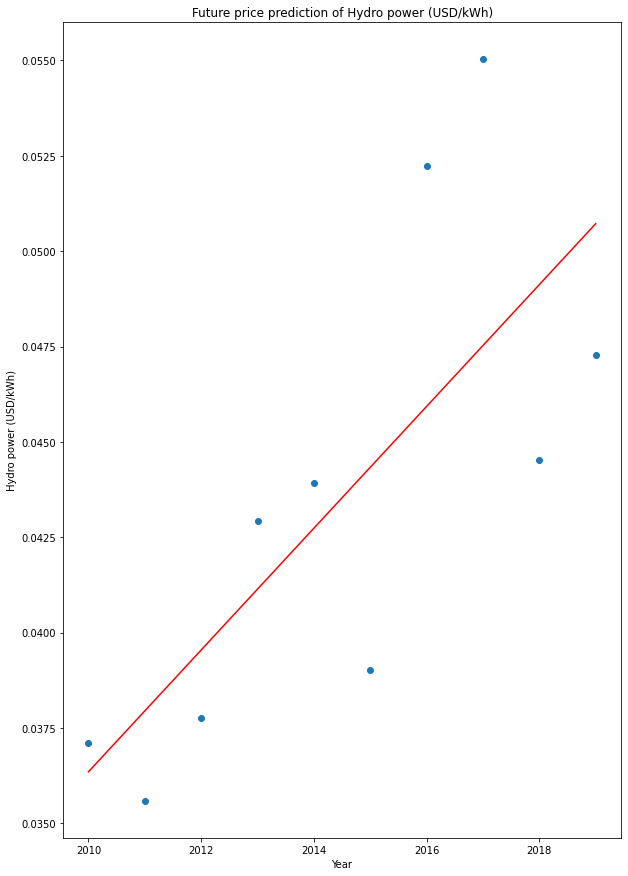

The correlation between 'Year' and 'Hydro power (USD/kWh)' is: 0.7426


In [ ]:
#plot scatterplot of hydro power LCOE (USD/kWh):
plot_scatterplot(df_lcoe_hydro, 'Year', 'Hydro power (USD/kWh)')
correlation(df_lcoe_hydro, 'Year', 'Hydro power (USD/kWh)')

<Figure size 720x1080 with 0 Axes>

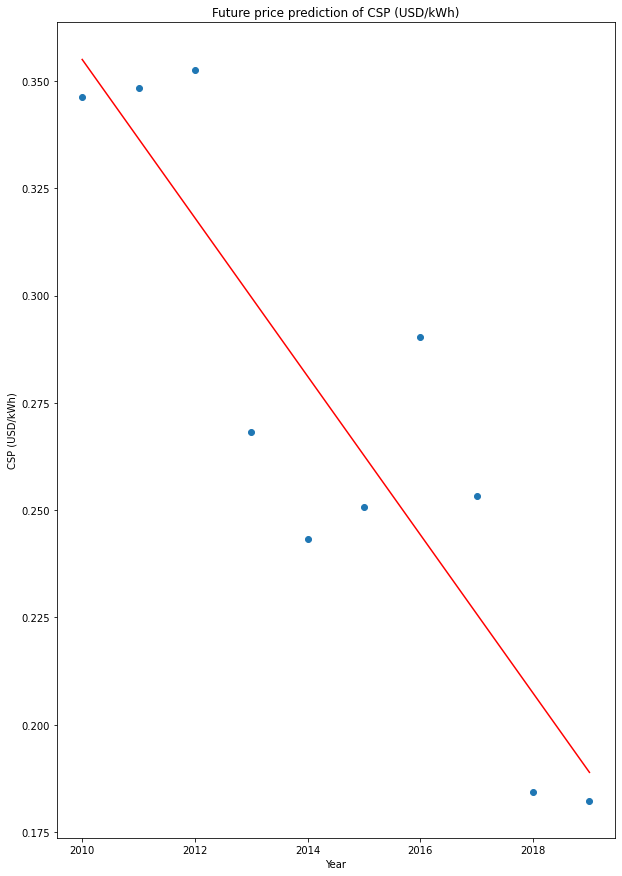

The correlation between 'Year' and 'CSP (USD/kWh)' is: -0.8893


In [ ]:
#plot scatterplot of Concentrated solar power LCOE (USD/kWh):
plot_scatterplot(df_lcoe_csp, 'Year', 'CSP (USD/kWh)')
correlation(df_lcoe_csp, 'Year', 'CSP (USD/kWh)')

<Figure size 720x1080 with 0 Axes>

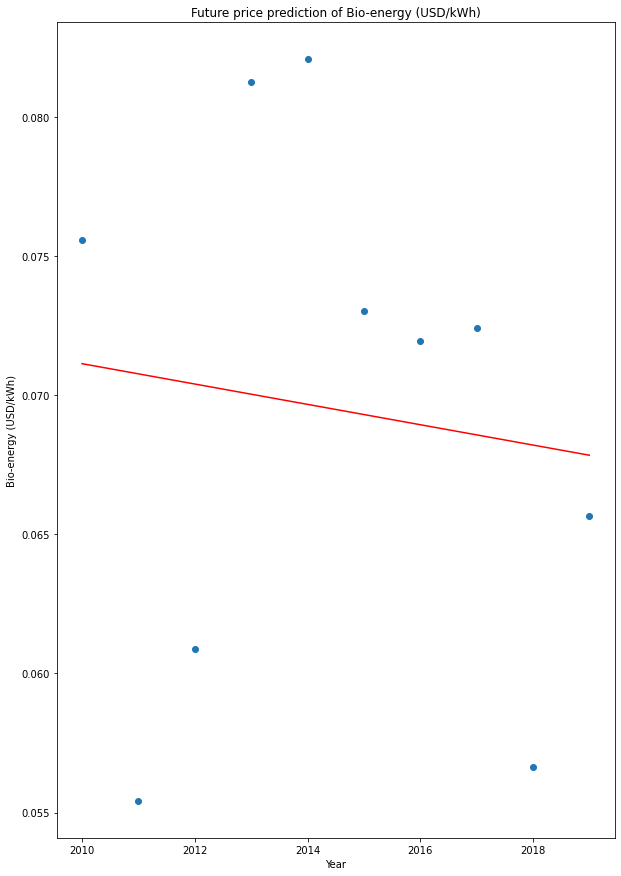

The correlation between 'Year' and 'Bio-energy (USD/kWh)' is: -0.1164


In [ ]:
#plot scatterplot of bio-energy power LCOE (USD/kWh):
plot_scatterplot(df_lcoe_bio, 'Year', 'Bio-energy (USD/kWh)')
correlation(df_lcoe_bio, 'Year', 'Bio-energy (USD/kWh)')

<Figure size 720x1080 with 0 Axes>

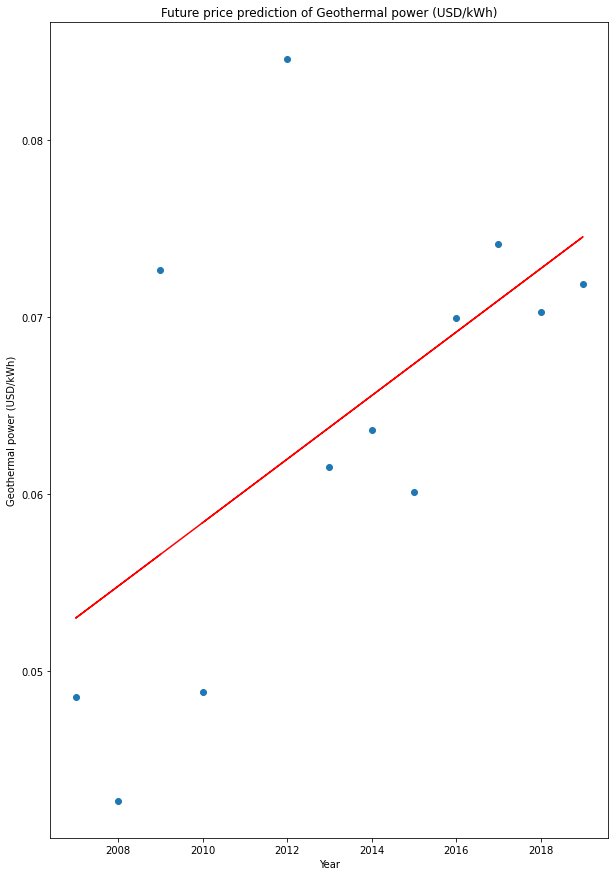

The correlation between 'Year' and 'Geothermal power (USD/kWh)' is: 0.5831


In [ ]:
#plot scatterplot of geothermal power LCOE (USD/kWh):
plot_scatterplot(df_lcoe_geo, 'Year', 'Geothermal power (USD/kWh)')
correlation(df_lcoe_geo, 'Year', 'Geothermal power (USD/kWh)')

<Figure size 720x1080 with 0 Axes>

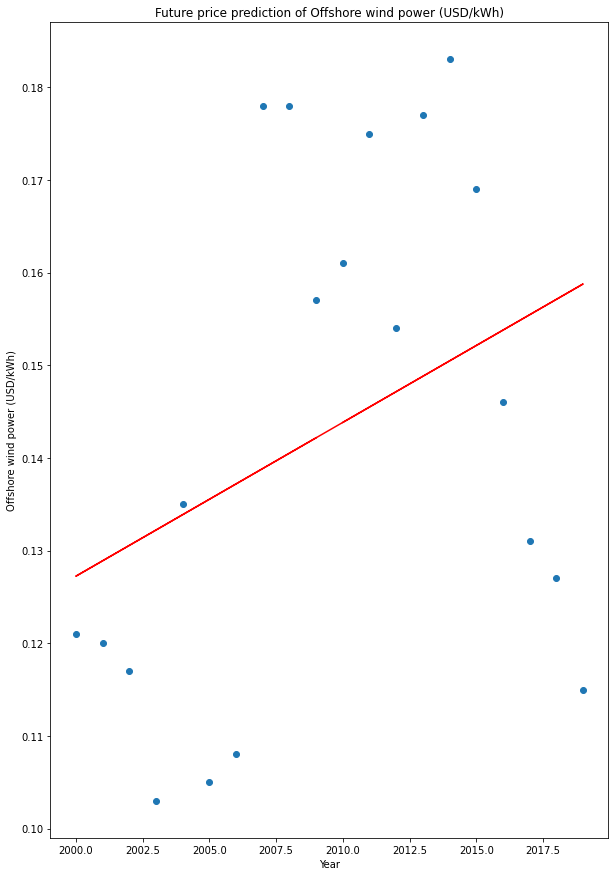

The correlation between 'Year' and 'Offshore wind power (USD/kWh)' is: 0.3524


In [ ]:
#plot scatterplot of offshore wind power LCOE (USD/kWh):
plot_scatterplot(df_lcoe_offshore, 'Year', 'Offshore wind power (USD/kWh)')
correlation(df_lcoe_offshore, 'Year', 'Offshore wind power (USD/kWh)')

Based on the linear regression the onshore wind power is the best future energy generator in regards of price/kWh. However the concentrated solar power is deemed to be a great alternative, but we lack data. 